In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

In [2]:
print("Obtendo os datasets")
_datasets = requests.get('https://tcogo-bgotc.tc.gc.ca/api/tcogobgotc/dataset')

Obtendo os datasets


In [3]:
_dfDatasetsTC = pd.read_json(_datasets.content)

In [4]:
#Publications du gouvernement ouvert par Transports Canada
#Open Government publications by Transport Canada
_dfDatasetsTC.head()

,dataset_id,title_translated_fr,title_translated_en,organization_id,organization_name,organization_title_fr,organization_title_en,notes_translated_fr,notes_translated_en,date_published
0,02774512-3fba-41e3-a36b-9bba8bc062f8,Indicateur hebdomadaire de performance des ter...,"Weekly rail terminal performance indicator, Tr...",A0F0FCFC-BC3B-4696-8B6D-E7E411D55BAC,statcan,Statistique Canada,Statistics Canada,<p>Ce produit présente des statistiques sur la...,<p>This product presents statistics on the rai...,2020-07-24 08:30:00
1,c993002d-c933-42b4-94b3-ab28764bdd6f,Utilisation et performance du réseau de transp...,Transportation system utilization and performa...,A0F0FCFC-BC3B-4696-8B6D-E7E411D55BAC,statcan,Statistique Canada,Statistics Canada,<p>Les indicateurs de performance mensuels s'a...,<p>Monthly performance indicators draw from a ...,2020-07-15 08:30:00
2,fb527690-6256-479f-8998-ae738c9cfec0,Installations de citernes routières et amovibles,Highway Tank and Transport Canada Portable Tan...,AEAE485F-42DE-4D33-AFA3-F8A3A76FC663,tc,Transports Canada,Transport Canada,Installations de citernes routières et amovibl...,Highway Tank and Transport Canada Portable Tan...,2016-11-01 00:00:00
3,9986be17-ee41-4891-ae88-0137edc3541e,Indicateurs hebdomadaires de performance du sy...,"Weekly rail system performance indicators, by ...",A0F0FCFC-BC3B-4696-8B6D-E7E411D55BAC,statcan,Statistique Canada,Statistics Canada,<p>Ce produit présente des statistiques sur la...,<p>This product presents statistics on the rai...,2020-07-24 08:30:00
4,ef91d197-7cdc-4864-a8c3-5dbbd88154e2,Vérification de l'étiquette SIMDUT et de la sa...,WHMIS Label and Cleaning Room Audit,AEAE485F-42DE-4D33-AFA3-F8A3A76FC663,tc,Transports Canada,Transport Canada,"À partir de janvier 2020, cet ensemble de donn...","Beginning in January 2020, this dataset contai...",2020-06-11 00:00:00


In [5]:
# verificando o tamanho do conjunto de dataset
print("Informações Sobre o Dataset")
print("Variáveis:\t {}".format(_dfDatasetsTC.shape[1]))
print("Entradas:\t {}\n".format(_dfDatasetsTC.shape[0]))

# identificando os tipos das variáveis
#display(_dfDatasetsTC.info())

#Analise rapida dos datasets
_dfDatasetsTC.describe(include='O')

Informações Sobre o Dataset
Variáveis:	 10
Entradas:	 78



,dataset_id,title_translated_fr,title_translated_en,organization_id,organization_name,organization_title_fr,organization_title_en,notes_translated_fr,notes_translated_en,date_published
count,78,78,78,78,78,78,78,78,78,78
unique,78,77,78,9,9,10,10,78,77,31
top,3aa8d197-9316-488d-9bf9-ebd5000890a3,Banque de données des rappels de la Sécurité R...,"Transportation revenues from users, by level o...",AEAE485F-42DE-4D33-AFA3-F8A3A76FC663,tc,Transports Canada,Transport Canada,Cette liste permet à l’Agence des services fro...,Highway Tank and Transport Canada Portable Tan...,2020-01-20 08:30:00
freq,1,2,1,38,38,38,38,1,2,13


In [6]:
# Criar uma variavel para conter apenas datasets TC
_dfDatasetsOrgTC = _dfDatasetsTC.loc[_dfDatasetsTC.organization_name == "tc"].copy()
_dfDatasetsOrgTC.head()

,dataset_id,title_translated_fr,title_translated_en,organization_id,organization_name,organization_title_fr,organization_title_en,notes_translated_fr,notes_translated_en,date_published
2,fb527690-6256-479f-8998-ae738c9cfec0,Installations de citernes routières et amovibles,Highway Tank and Transport Canada Portable Tan...,AEAE485F-42DE-4D33-AFA3-F8A3A76FC663,tc,Transports Canada,Transport Canada,Installations de citernes routières et amovibl...,Highway Tank and Transport Canada Portable Tan...,2016-11-01 00:00:00
4,ef91d197-7cdc-4864-a8c3-5dbbd88154e2,Vérification de l'étiquette SIMDUT et de la sa...,WHMIS Label and Cleaning Room Audit,AEAE485F-42DE-4D33-AFA3-F8A3A76FC663,tc,Transports Canada,Transport Canada,"À partir de janvier 2020, cet ensemble de donn...","Beginning in January 2020, this dataset contai...",2020-06-11 00:00:00
5,5cb32773-e7b1-4681-b82a-43cc39778c1a,Registre des petits bâtiments commerciaux,Canadian Register of Small Commercial Vessels,AEAE485F-42DE-4D33-AFA3-F8A3A76FC663,tc,Transports Canada,Transport Canada,Le Registre des petits bâtiments inclus inform...,The Canadian Register of Small Commercial Vess...,2014-02-27 00:00:00
9,1ec92326-47ef-4110-b7ca-959fab03f96d,Banque de données des rappels de la Sécurité R...,Vehicle Recalls Database,AEAE485F-42DE-4D33-AFA3-F8A3A76FC663,tc,Transports Canada,Transport Canada,La Banque de données des rappels de la sécurit...,The Vehicles Recall Database is used by the De...,2012-08-26 00:00:00
12,a08dcc46-f02f-4dfa-8608-4b59a46c2e8e,Plan de mise en œuvre pour un gouvernement ouv...,Open Government Implementation Plan – Transpor...,AEAE485F-42DE-4D33-AFA3-F8A3A76FC663,tc,Transports Canada,Transport Canada,Ce document présente le plan que Transports Ca...,This document describes Transport Canada’s pla...,2015-10-29 00:00:00


In [7]:
#Analise rapida dos datasets
_dfDatasetsOrgTC.describe(include='O')

,dataset_id,title_translated_fr,title_translated_en,organization_id,organization_name,organization_title_fr,organization_title_en,notes_translated_fr,notes_translated_en,date_published
count,38,38,38,38,38,38,38,38,38,38
unique,38,37,38,1,1,1,1,38,37,17
top,feee373c-5856-4e50-9782-463837ef80fb,Banque de données des rappels de la Sécurité R...,Airports,AEAE485F-42DE-4D33-AFA3-F8A3A76FC663,tc,Transports Canada,Transport Canada,Le fichier contient l'information sur la marqu...,Highway Tank and Transport Canada Portable Tan...,2020-06-11 00:00:00
freq,1,2,1,38,38,38,38,1,2,9


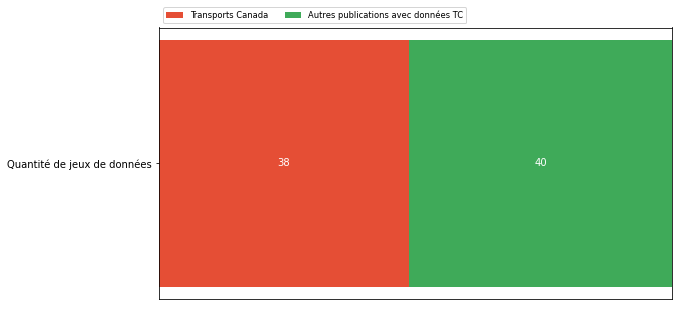

In [10]:
category_names = ['Transports Canada', 'Autres publications avec données TC']
results = {
    'Quantité de jeux de données': [len(_dfDatasetsOrgTC.axes[0]), len(_dfDatasetsTC.axes[0]) - len(_dfDatasetsOrgTC.axes[0])]
}


def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()


In [11]:
print("Obtendo os comentarios")
_commentsTC = requests.get('https://tcogo-bgotc.tc.gc.ca/api/tcogobgotc/comment')

Obtendo os comentarios


In [12]:
_dfAllComments = pd.read_json(_commentsTC.content)

In [13]:
_dfAllComments.head()

,comment_id,parent_id,dataset_id,subject,comment_body,comment_posted_by,date_posted,thread
0,9560,NaN,bf00b7f4-e370-46b7-94e4-0bdedc98531b,i cannot download the file in,<p>i cannot download the file in XML format f...,ndegreef,2016-11-03T00:00:00,01/
1,9584,NaN,bf00b7f4-e370-46b7-94e4-0bdedc98531b,"Hello,","<p>Hello,</p>\n<p>Could you give an exemple on...",SarrasiM,2016-11-25T00:00:00,02/
2,9585,NaN,bf00b7f4-e370-46b7-94e4-0bdedc98531b,"Hi,","<p>Hi,</p>\n<p>How would I get a complete list...",SarrasiM,2016-11-25T00:00:00,03/
3,9622,NaN,bf00b7f4-e370-46b7-94e4-0bdedc98531b,Further to the open-ouvert,<p>Further to the open-ouvert comment on Nov 7...,ndegreef,2016-12-15T00:00:00,04/
4,9697,NaN,bf00b7f4-e370-46b7-94e4-0bdedc98531b,Kurt,<p>Kurt</p>,Atlantic breeze,2017-02-08T00:00:00,05/


In [20]:
# Quantité des commentaires reçus
print("Quantité des commentaires reçus")
#print("Variáveis:\t {}".format(_dfAllComments.shape[1]))
print("Entrées:\t {}\n".format(_dfAllComments.shape[0]))

# Identification des variables
display(_dfAllComments.info())

Quantité des commentaires reçus
Entrées:	 257

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   comment_id         257 non-null    int64         
 1   parent_id          100 non-null    float64       
 2   dataset_id         257 non-null    object        
 3   subject            257 non-null    object        
 4   comment_body       257 non-null    object        
 5   comment_posted_by  257 non-null    object        
 6   date_posted        257 non-null    datetime64[ns]
 7   thread             257 non-null    object        
 8   Count              257 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 13.1+ KB


None

In [21]:
# Converter colunas relacionadas a data de object para datetime
_dfAllComments['date_posted'] = pd.to_datetime(_dfAllComments['date_posted'])
_dfAllComments['Count'] = 1

In [22]:
# Analise rápida das variáveis categoricas
_dfAllComments.describe(include='O')

,dataset_id,subject,comment_body,comment_posted_by,thread
count,257,257,257,257,257
unique,15,230,253,155,107
top,1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a,Thank you for your inquiry.,<p>Thank you for your comments. We will look i...,open-ouvert,01/
freq,78,7,2,54,14


In [23]:
# Merge dos dados 
_dfCommentsOrgTC = pd.merge(_dfDatasetsOrgTC, 
                    _dfAllComments, 
                    on='dataset_id', 
                    how='inner') 

_dfCommentsOrgTC.head()

,dataset_id,title_translated_fr,title_translated_en,organization_id,organization_name,organization_title_fr,organization_title_en,notes_translated_fr,notes_translated_en,date_published,comment_id,parent_id,subject,comment_body,comment_posted_by,date_posted,thread,Count
0,5cb32773-e7b1-4681-b82a-43cc39778c1a,Registre des petits bâtiments commerciaux,Canadian Register of Small Commercial Vessels,AEAE485F-42DE-4D33-AFA3-F8A3A76FC663,tc,Transports Canada,Transport Canada,Le Registre des petits bâtiments inclus inform...,The Canadian Register of Small Commercial Vess...,2014-02-27 00:00:00,20256,NaN,I registered my boat 4 years…,I registered my boat 4 years ago and I’m still...,Onorato,2020-04-29,0a/,1
1,5cb32773-e7b1-4681-b82a-43cc39778c1a,Registre des petits bâtiments commerciaux,Canadian Register of Small Commercial Vessels,AEAE485F-42DE-4D33-AFA3-F8A3A76FC663,tc,Transports Canada,Transport Canada,Le Registre des petits bâtiments inclus inform...,The Canadian Register of Small Commercial Vess...,2014-02-27 00:00:00,10637,NaN,"webpage info ,","<p>terrible navigation , can not find proper p...",anne campbell,2018-05-08,02/,1
2,5cb32773-e7b1-4681-b82a-43cc39778c1a,Registre des petits bâtiments commerciaux,Canadian Register of Small Commercial Vessels,AEAE485F-42DE-4D33-AFA3-F8A3A76FC663,tc,Transports Canada,Transport Canada,Le Registre des petits bâtiments inclus inform...,The Canadian Register of Small Commercial Vess...,2014-02-27 00:00:00,10735,NaN,bateau detruit et un autre vendu,<p>J `ai detruit un de mes bateaux et je veux ...,Serge Michaud,2018-04-01,01/,1
3,5cb32773-e7b1-4681-b82a-43cc39778c1a,Registre des petits bâtiments commerciaux,Canadian Register of Small Commercial Vessels,AEAE485F-42DE-4D33-AFA3-F8A3A76FC663,tc,Transports Canada,Transport Canada,Le Registre des petits bâtiments inclus inform...,The Canadian Register of Small Commercial Vess...,2014-02-27 00:00:00,10913,NaN,small vessel search,<p>Site is useless for vessel searches.<br />\...,b. giffin,2018-07-24,03/,1
4,5cb32773-e7b1-4681-b82a-43cc39778c1a,Registre des petits bâtiments commerciaux,Canadian Register of Small Commercial Vessels,AEAE485F-42DE-4D33-AFA3-F8A3A76FC663,tc,Transports Canada,Transport Canada,Le Registre des petits bâtiments inclus inform...,The Canadian Register of Small Commercial Vess...,2014-02-27 00:00:00,11560,NaN,Inutile,<p>Impossible d&#039;activer une fonction de r...,Guy Bouchard,2019-04-20,04/,1


In [26]:
# verificando o tamanho do conjunto de dataset dos comentarios
print("Quantité des commentaires reçus")
#print("Variáveis:\t {}".format(_dfCommentsOrgTC.shape[1]))
print("Entrées:\t {}\n".format(_dfAllComments.shape[0] - _dfCommentsOrgTC.shape[0]))

# Identification des variables
display(_dfCommentsOrgTC.info())

Quantité des commentaires reçus
Entrées:	 22

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   dataset_id             235 non-null    object        
 1   title_translated_fr    235 non-null    object        
 2   title_translated_en    235 non-null    object        
 3   organization_id        235 non-null    object        
 4   organization_name      235 non-null    object        
 5   organization_title_fr  235 non-null    object        
 6   organization_title_en  235 non-null    object        
 7   notes_translated_fr    235 non-null    object        
 8   notes_translated_en    235 non-null    object        
 9   date_published         235 non-null    object        
 10  comment_id             235 non-null    int64         
 11  parent_id              93 non-null     float64       
 12  subject           

None

In [27]:
# Analise rápida das variáveis categoricas
_dfCommentsOrgTC.describe(include='O')

,dataset_id,title_translated_fr,title_translated_en,organization_id,organization_name,organization_title_fr,organization_title_en,notes_translated_fr,notes_translated_en,date_published,subject,comment_body,comment_posted_by,thread
count,235,235,235,235,235,235,235,235,235,235,235,235,235,235
unique,12,12,12,1,1,1,1,12,12,10,210,231,142,105
top,1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a,Base nationale de données sur les collisions,National Collision Database,AEAE485F-42DE-4D33-AFA3-F8A3A76FC663,tc,Transports Canada,Transport Canada,Base nationale de données sur les collisions (...,National Collision Database (NCDB) – a databas...,2013-06-13 00:00:00,Thank you for your inquiry.,<p>Thank you for your inquiry. To address the ...,open-ouvert,01/
freq,78,78,78,235,235,235,235,78,78,78,7,2,50,11


In [28]:

qtdcomTotal = len(_dfAllComments.axes[0]) 
qtdcomTC = len(_dfCommentsOrgTC.axes[0])
qtdcomOthers = qtdcomTotal - qtdcomTC
#print(qtdcomOthers)

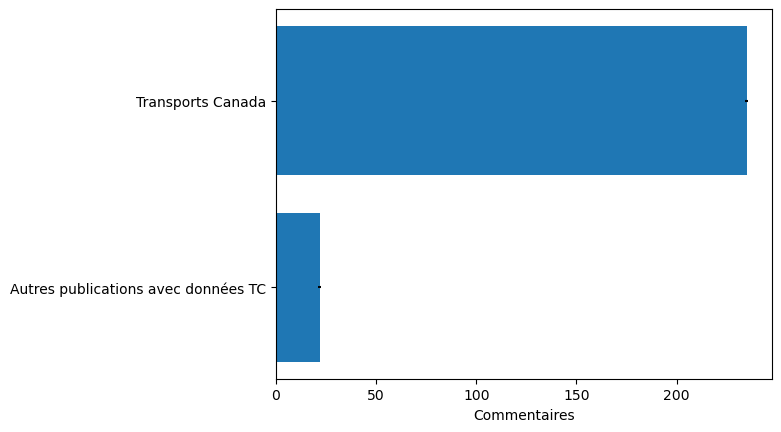

In [32]:
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
types = ('Transports Canada', 'Autres publications avec données TC')
qtd = [qtdcomTC,qtdcomOthers]
y_pos = np.arange(len(types))

error = np.random.rand(len(types))

ax.barh(y_pos, qtd, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(types)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Commentaires')
#ax.set_title('Open Government publications by Transport Canada - Comments')

plt.show()

In [37]:
# Converter colunas relacionadas a data de object para datetime
_dfAllComments['date_posted'] = pd.to_datetime(_dfAllComments['date_posted'])
#_dfDatasets['date_published'] = pd.to_datetime(_dfDatasets['date_published'])
_dfAllComments['Count'] = 1

In [177]:
# identificar bases com mais comentários TC
df_1 = pd.DataFrame(_dfAllComments, columns = ['dataset_id','Count']) # Definir tabela
df_1 = df_1.groupby(by=['dataset_id'])['Count'].sum().reset_index().sort_values(by=['Count'], ascending=False)[0:40] 
# Agrupar comentarios por tipo relatorio
df_1.head(40)

,dataset_id,Count
2,1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a,78
7,935cf4d3-7e8d-4e9b-8dfd-c02643d4f782,60
3,1ec92326-47ef-4110-b7ca-959fab03f96d,23
12,d0f54727-6c0b-4e5a-aa04-ea1463cf9f4c,20
10,bf00b7f4-e370-46b7-94e4-0bdedc98531b,19
13,d38de914-c94c-429b-8ab1-8776c31643e3,16
4,5cb32773-e7b1-4681-b82a-43cc39778c1a,12
1,197260f1-b5dc-4f53-a036-2541cff379eb,11
14,d9391250-c2fa-47ed-9216-aa38eb449aaf,6
9,ac26807e-a1e8-49fa-87bf-451175a859b8,4


In [180]:
df_1.describe(include='O')

,dataset_id
count,15
unique,15
top,d9391250-c2fa-47ed-9216-aa38eb449aaf
freq,1


In [39]:
# Preparar o dataset para uma visao de qtd comentarios x dia
df_2 = pd.DataFrame(_dfAllComments, columns = ['dataset_id','Count','date_posted']) # Definir tabela
df_2 = df_2.groupby(by=['dataset_id', 'date_posted'])['Count'].sum().reset_index().sort_values(by=['date_posted'], ascending=False)

In [40]:
df_2.head()

,dataset_id,date_posted,Count
152,935cf4d3-7e8d-4e9b-8dfd-c02643d4f782,2020-07-05,1
151,935cf4d3-7e8d-4e9b-8dfd-c02643d4f782,2020-07-03,1
150,935cf4d3-7e8d-4e9b-8dfd-c02643d4f782,2020-06-19,1
149,935cf4d3-7e8d-4e9b-8dfd-c02643d4f782,2020-06-12,1
63,1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a,2020-05-21,1


In [176]:
# Preparar o dataset para uma visao de qtd comentarios x dia
df_max = pd.DataFrame(_dfAllComments, columns = ['dataset_id','Count','date_posted']) # Definir tabela
df_max = df_max.groupby(by=['dataset_id', 'date_posted'])['Count'].sum().reset_index().sort_values(by=['Count'])

max = df_max['Count'] > 7

# Agrupar comentarios por tipo relatorio
df_max_comments = df_max[max]

# Merge dos dados 
_dfMaxComments = pd.merge(_dfDatasetsOrgTC, 
                    df_max_comments, 
                    on='dataset_id', 
                    how='inner') 

_dfMaxComments[['title_translated_fr', 'organization_title_fr', 'Count']].head()

,title_translated_fr,organization_title_fr,Count
0,Base nationale de données sur les collisions,Transports Canada,9


In [166]:
countWords = collections.Counter(_dfMaxComments['title_translated_fr'])
print(countWords)

Counter({"la base de données à partir du registre d'immatriculation des aéronefs": 56, 'Base nationale de données sur les collisions': 54, 'Banque de données des rappels de la Sécurité Routière': 18, "Registre canadien d'immatriculation des gros bâtiments": 15, 'Inventaire des passages à niveau': 15, 'Registre des petits bâtiments commerciaux': 11, 'Annexe 1 du Règlement sur le transport de marchandises dangereuses': 9, 'Liste des membres du programme de sûreté du fret aérien (SFA)': 5, 'Entreprises enregistrées avec Transports Canada pour apposer la Marque nationale de sécurité ': 3, "Système de compte rendu quotidien des événements de l'Aviation civile": 1, 'Réseau routier national du Canada': 1, "Installations de vérifications et d'épreuves d'étanchéité de grands récipients pour vrac (GRV) inscrites": 1})


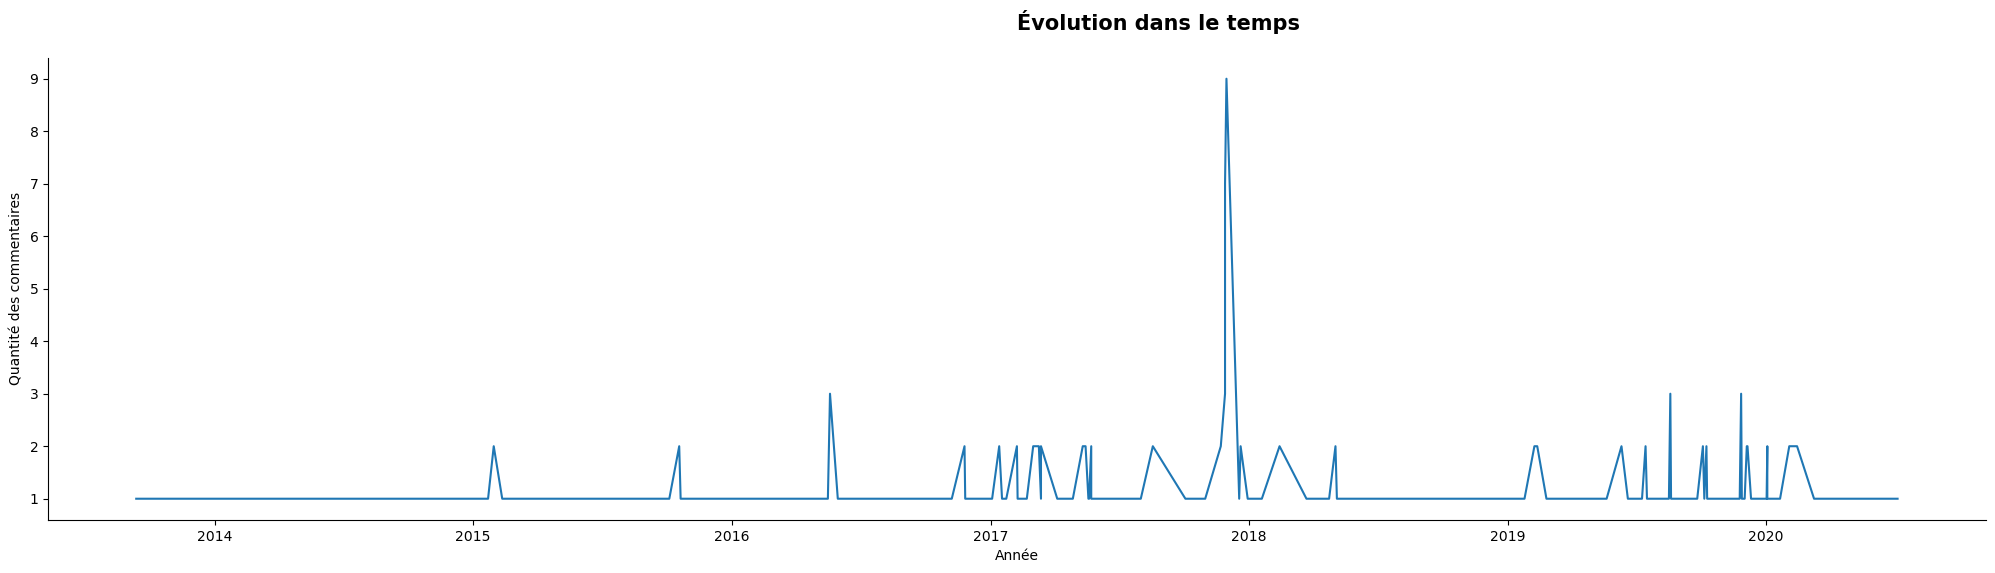

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,6))

ax.plot(df_2['date_posted'], df_2['Count'])
ax.set_title('Évolution dans le temps', fontsize=15, fontweight='bold',pad=20, ha='left')
ax.set_xlabel('Année')
ax.set_ylabel('Quantité des commentaires')

sns.despine(fig)
plt.show()

In [43]:
# ver a quantidade de valores ausentes
print("Valores ausentes para comment_body: ", _dfAllComments.comment_body.isnull().sum())

# eliminar as colunas com valores ausentes
comment_body = _dfAllComments.dropna(subset=['comment_body'], axis=0)['comment_body']

Valores ausentes para comment_body:  0


In [46]:
# concatenar as palavras
all_comment_body = " ".join(s for s in comment_body)
print("Quantité total de mots existants dans les commentaires: {}".format(len(all_comment_body)))


Quantité total de mots existants dans les commentaires: 70098


In [47]:
# lista de stopword
resultwords = []
stopwordstexto = ['xml','format','a','order','by','order by','saf','sec','hello','format','transport','canada','with','xml','amp','quot','sur','thanks','v1','query','eng','thank','the',',', '&', 'nbsp', ';', '/p','open-ouvert','open','government','format=XML','href=','<', 'p', '>','order_by','site','wwwapps','thank','thanks','the','tc','gc','open','government','href','team','ca','br','please','hi','http','</p>','<br />','you','your','will','https','www','comment']

# converting to lowercase
lower_case = all_comment_body.lower()

texto1=re.split("\W+",lower_case)

for word in texto1:
    if word not in stopwordstexto:
        resultwords.append(word)

print("Quantité total de mots existants dans les commentaires: {}".format(len(all_comment_body)))
print("Quantité de mots à être analisés: {}".format(len(resultwords)))


Quantité total de mots existants dans les commentaires: 70098
Quantité de mots à être analisés: 8860


In [48]:
result = " ".join(s for s in resultwords)

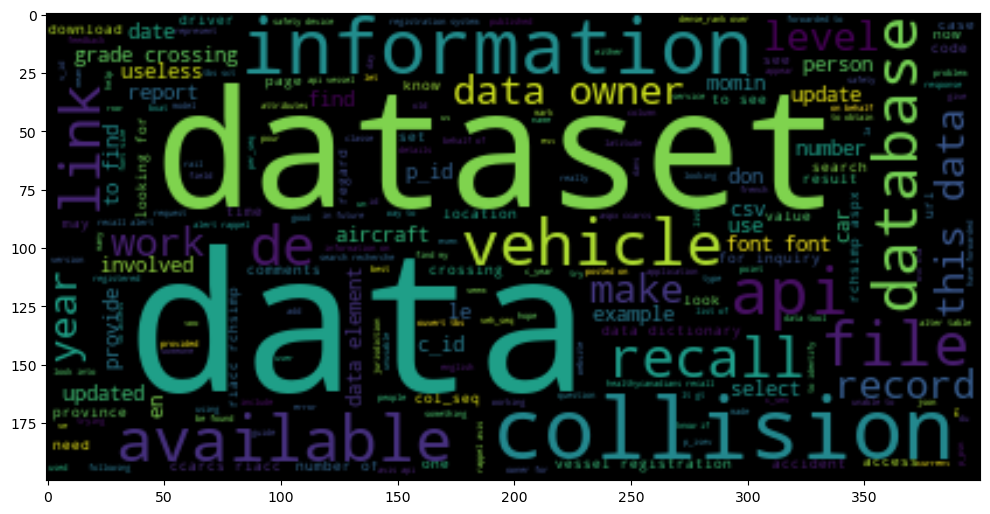

In [49]:
# gerar uma wordcloud
wordcloud = WordCloud(background_color="black").generate(result)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

In [50]:
#Criacao da lista de sentimentos com palavras pre-definidas
emotion_list = []
    
with open('emotions.txt','r') as file:
    for line in file:
        clear_line = line.replace('\n','').replace(',','').replace("'",'').strip()
        word,emotion = clear_line.split(':')
        if word in result:
            emotion_list.append(emotion)

In [104]:
countWords = collections.Counter(emotion_list)
print("Total de palavras analisadas: {}".format(len(emotion_list)))
#print("Detalhamento do total de palavras analisadas: {}".format(countWords))
print(countWords)

dfWords =[]
dfWords = pd.DataFrame(columns=['word', 'count'])
count = 0
for emo in countWords:
    dfWords.loc[count] = [emo, countWords[emo]] 
    count+=1

dfWords.head()

Total de palavras analisadas: 36
Counter({' happy': 5, ' sad': 4, ' attracted': 3, ' powerless': 3, ' angry': 3, ' fearless': 2, ' attached': 2, ' fearful': 2, ' free': 2, ' esteemed': 1, ' focused': 1, ' ecstatic': 1, ' lost': 1, ' singled out': 1, ' adequate': 1, ' lustful': 1, ' loved': 1, ' alone': 1, ' apathetic': 1})


,word,count
0,attracted,3
1,esteemed,1
2,fearless,2
3,attached,2
4,powerless,3


In [105]:
print(dfWords.describe(include='O'))

             word  count
count          19     19
unique         19      5
top      ecstatic      1
freq            1     10


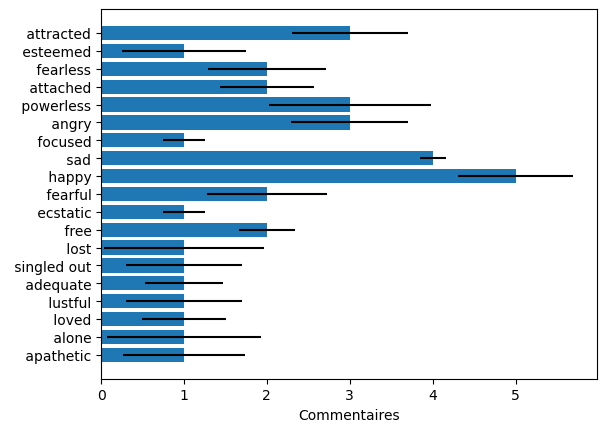

In [108]:
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
types = dfWords['word']
qtd = dfWords['count']
y_pos = np.arange(len(dfWords))

error = np.random.rand(len(types))

ax.barh(y_pos, qtd, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(types)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Commentaires')
#ax.set_title('Open Government publications by Transport Canada - Comments')

plt.show()

In [109]:
resultemotion = " ".join(s for s in emotion_list)
#print(resultnegwords)

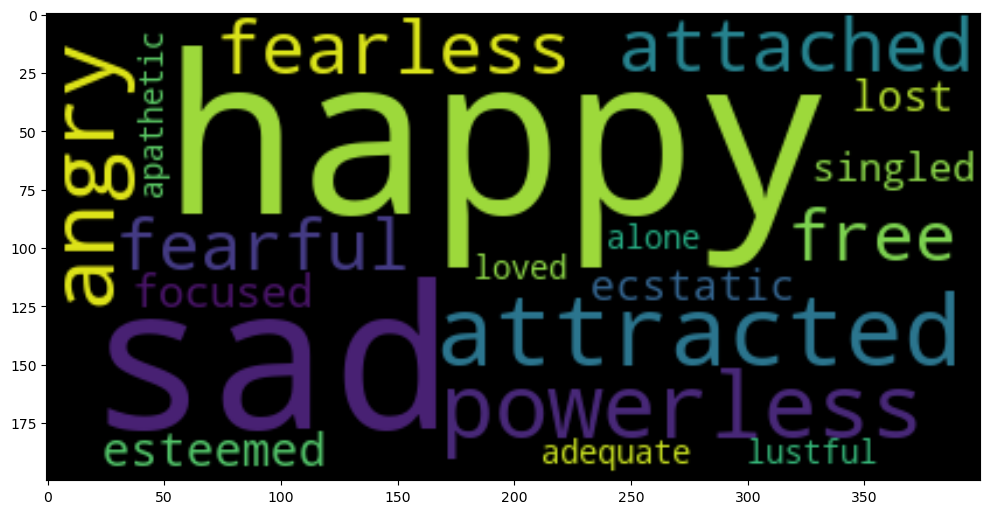

In [110]:
# gerar uma wordcloud
wordcloudwords = WordCloud(background_color="black").generate(resultemotion)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloudwords, interpolation='bilinear')

plt.tight_layout()

In [115]:
#Criacao de analise de sentimento de um unico dataset
_dfSpecDataset = _dfAllComments.loc[(_dfAllComments.dataset_id == "1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a") | (_dfAllComments.dataset_id == "935cf4d3-7e8d-4e9b-8dfd-c02643d4f782")].copy()
_dfSpecDataset.head()

,comment_id,parent_id,dataset_id,subject,comment_body,comment_posted_by,date_posted,thread,Count
19,9140,NaN,935cf4d3-7e8d-4e9b-8dfd-c02643d4f782,Unusable,<p>Unusable</p>,Anonymous,2015-08-29,02/,1
20,9151,NaN,935cf4d3-7e8d-4e9b-8dfd-c02643d4f782,Completely user unfriendly.,<p>Completely user unfriendly. I couldn&#039;...,D. Anderson,2015-09-10,03/,1
21,9156,NaN,935cf4d3-7e8d-4e9b-8dfd-c02643d4f782,A registered aircraft I flew,<p>A registered aircraft I flew yesterday is s...,Anonymous,2015-09-26,04/,1
22,9164,NaN,935cf4d3-7e8d-4e9b-8dfd-c02643d4f782,"unusable, especially compared","<p>unusable, especially compared with the &#03...",pilot,2015-10-19,05/,1
23,9166,NaN,935cf4d3-7e8d-4e9b-8dfd-c02643d4f782,"All ""Download"" links take you",<p>All &quot;Download&quot; links take you to ...,A. Boyd,2015-10-21,06/,1


In [116]:
# ver a quantidade de valores ausentes
print("Valores ausentes para comment_body: ", _dfSpecDataset.comment_body.isnull().sum())

# eliminar as colunas com valores ausentes
comment_body_specdataset = _dfSpecDataset.dropna(subset=['comment_body'], axis=0)['comment_body']

Valores ausentes para comment_body:  0


In [120]:
# concatenar as palavras
all_comment_body_specdataset = " ".join(s for s in comment_body_specdataset)

Quantité total de mots existants dans les commentaires pour les 2 jeux de données: 40063


In [122]:
# lista de stopword
resultwords_specdataset = []

# converting to lowercase
lower_case_specdataset = all_comment_body_specdataset.lower()

texto_specdataset=re.split("\W+",lower_case_specdataset)

for word in texto_specdataset:
    if word not in stopwordstexto:
        resultwords_specdataset.append(word)

print("Quantité total de mots existants dans les commentaires: {}".format(len(all_comment_body_specdataset)))
print("Quantité de mots à être analisés: {}".format(len(resultwords_specdataset)))


Quantité total de mots existants dans les commentaires: 40063
Quantité de mots à être analisés: 4989


In [123]:
result_specdataset = " ".join(s for s in resultwords_specdataset)

In [124]:
emotion_list_specdataset = []
emotion_total = []

with open('emotions.txt','r') as file:
    for line in file:
        clear_line = line.replace('\n','').replace(',','').replace("'",'').strip()
        word,emotion = clear_line.split(':')
        emotion_total.append(emotion)
        if word in result_specdataset:
            emotion_list_specdataset.append(emotion)
            
#print(emotion_list_specdataset)

In [126]:
countWords = collections.Counter(emotion_list_specdataset)
print("Total de palavras analisadas: {}".format(len(countWords)))
print("Detalhamento do total de palavras analisadas: {}".format(countWords))

result_emotion_total = [] 

unique_values = set()
for col in emotion_total:
    #print(col)
    if col not in result_emotion_total:
        result_emotion_total.append(col)
        
dfWords =[]
dfWords = pd.DataFrame(columns=['word', 'count'])
count = 0
for emo in countWords:
    dfWords.loc[count] = [emo, countWords[emo]] 
    count+=1

dfWords.head()

Total de palavras analisadas: 14
Detalhamento do total de palavras analisadas: Counter({' sad': 4, ' attracted': 3, ' happy': 3, ' free': 2, ' angry': 2, ' powerless': 2, ' fearless': 1, ' focused': 1, ' ecstatic': 1, ' lost': 1, ' adequate': 1, ' fearful': 1, ' alone': 1, ' apathetic': 1})


,word,count
0,attracted,3
1,fearless,1
2,focused,1
3,sad,4
4,ecstatic,1


In [127]:
print (result_emotion_total)

[' cheated', ' singled out', ' loved', ' attracted', ' sad', ' fearful', ' happy', ' angry', ' bored', ' esteemed', ' lustful', ' attached', ' independent', ' embarrassed', ' powerless', ' surprise', ' fearless', ' safe', ' adequate', ' belittled', ' hated', ' codependent', ' average', ' apathetic', ' obsessed', ' entitled', ' alone', ' focused', ' demoralized', ' derailed', ' anxious', ' ecstatic', ' free', ' lost', ' burdened']


In [128]:
resultfinal_specdataset = " ".join(s for s in emotion_list_specdataset)
#print(resultnegwords)

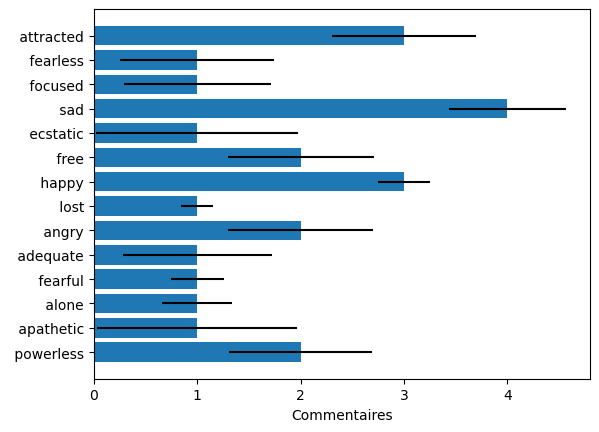

In [129]:
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
types = dfWords['word']
qtd = dfWords['count']
y_pos = np.arange(len(dfWords))

error = np.random.rand(len(types))

ax.barh(y_pos, qtd, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(types)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Commentaires')
#ax.set_title('Open Government publications by Transport Canada - Comments')

plt.show()

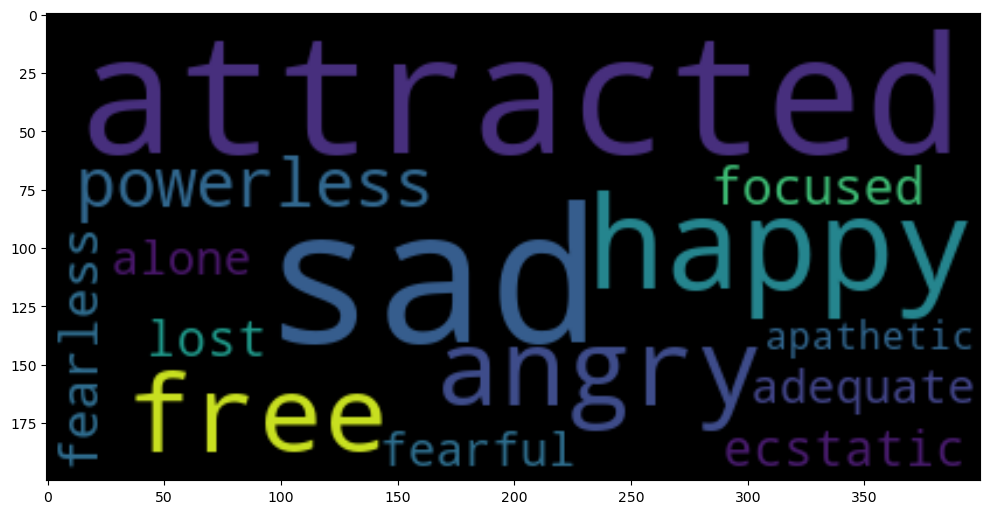

In [130]:
# gerar uma wordcloud
wordcloudwords = WordCloud(background_color="black").generate(resultfinal_specdataset)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloudwords, interpolation='bilinear')

plt.tight_layout()

In [140]:
#Criacao de analise de sentimento sem o dataset analisado acima
_df = _dfAllComments.loc[(_dfAllComments.dataset_id != "1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a") & (_dfAllComments.dataset_id != "935cf4d3-7e8d-4e9b-8dfd-c02643d4f782")].copy()
_df.head()

,comment_id,parent_id,dataset_id,subject,comment_body,comment_posted_by,date_posted,thread,Count
0,9560,NaN,bf00b7f4-e370-46b7-94e4-0bdedc98531b,i cannot download the file in,<p>i cannot download the file in XML format f...,ndegreef,2016-11-03,01/,1
1,9584,NaN,bf00b7f4-e370-46b7-94e4-0bdedc98531b,"Hello,","<p>Hello,</p>\n<p>Could you give an exemple on...",SarrasiM,2016-11-25,02/,1
2,9585,NaN,bf00b7f4-e370-46b7-94e4-0bdedc98531b,"Hi,","<p>Hi,</p>\n<p>How would I get a complete list...",SarrasiM,2016-11-25,03/,1
3,9622,NaN,bf00b7f4-e370-46b7-94e4-0bdedc98531b,Further to the open-ouvert,<p>Further to the open-ouvert comment on Nov 7...,ndegreef,2016-12-15,04/,1
4,9697,NaN,bf00b7f4-e370-46b7-94e4-0bdedc98531b,Kurt,<p>Kurt</p>,Atlantic breeze,2017-02-08,05/,1


In [141]:
# ver a quantidade de valores ausentes
print("Valores ausentes para comment_body: ", _df.comment_body.isnull().sum())

# eliminar as colunas com valores ausentes
comment_body_ds = _df.dropna(subset=['comment_body'], axis=0)['comment_body']

Valores ausentes para comment_body:  0


In [142]:
# concatenar as palavras
all_comment_body_ds = " ".join(s for s in comment_body_ds)
print("Quantidade de Palavras Total: {}".format(len(all_comment_body_ds)))


Quantidade de Palavras Total: 30034


In [150]:
# lista de stopword
resultwords_ds = []

# converting to lowercase
lower_case_ds = all_comment_body_ds.lower()

textods=re.split("\W+",lower_case_ds)

for word in textods:
    if word not in stopwordstexto:
        resultwords_ds.append(word)

print("Quantité total de mots existants dans les commentaires: {}".format(len(all_comment_body_ds)))
print("Quantité de mots à être analisés: {}".format(len(resultwords_ds)))

Quantité total de mots existants dans les commentaires: 30034
Quantité de mots à être analisés: 3873


In [151]:
result_ds = " ".join(s for s in resultwords_ds)

In [152]:
emotion_list_ds = []
    
with open('emotions.txt','r') as file:
    for line in file:
        clear_line = line.replace('\n','').replace(',','').replace("'",'').strip()
        word,emotion = clear_line.split(':')
        
        if word in result_ds:
            emotion_list_ds.append(emotion)
            
#print(emotion_list_specdataset)

In [154]:
countWords = Counter(emotion_list_ds)
print("Total de palavras analisadas: {}".format(len(countWords)))
print("Detalhamento do total de palavras analisadas: {}".format(countWords))

dfWords =[]
dfWords = pd.DataFrame(columns=['word', 'count'])
count = 0
for emo in countWords:
    dfWords.loc[count] = [emo, countWords[emo]] 
    count+=1

dfWords.head()

Total de palavras analisadas: 16
Detalhamento do total de palavras analisadas: Counter({' sad': 3, ' happy': 3, ' attached': 2, ' powerless': 2, ' angry': 2, ' attracted': 1, ' esteemed': 1, ' fearful': 1, ' lost': 1, ' singled out': 1, ' free': 1, ' adequate': 1, ' fearless': 1, ' lustful': 1, ' loved': 1, ' apathetic': 1})


,word,count
0,attracted,1
1,esteemed,1
2,attached,2
3,powerless,2
4,angry,2


In [155]:
resultfinal_ds = " ".join(s for s in emotion_list_ds)

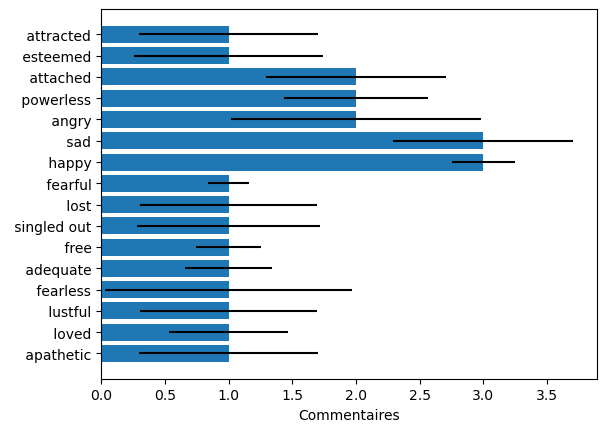

In [156]:
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
types = dfWords['word']
qtd = dfWords['count']
y_pos = np.arange(len(dfWords))

error = np.random.rand(len(types))

ax.barh(y_pos, qtd, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(types)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Commentaires')
#ax.set_title('Open Government publications by Transport Canada - Comments')

plt.show()

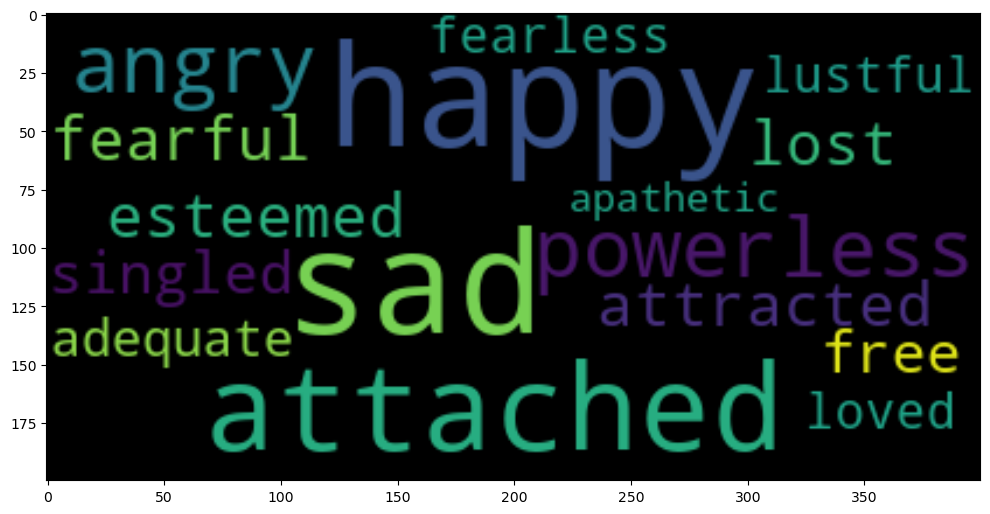

In [157]:
# gerar uma wordcloud
wordcloudwords = WordCloud(background_color="black").generate(resultfinal_ds)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloudwords, interpolation='bilinear')

plt.tight_layout()